#### Audio Classification Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

In [ ]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/drive/MyDrive/Intoxicated-20230513T114658Z-001/Intoxicated/29 Jul, 12.00 am.mp3'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[ 0.          0.          0.         ... -0.00645579 -0.00495711
 -0.00194246]


In [ ]:
librosa_audio_data.shape

(91728,)

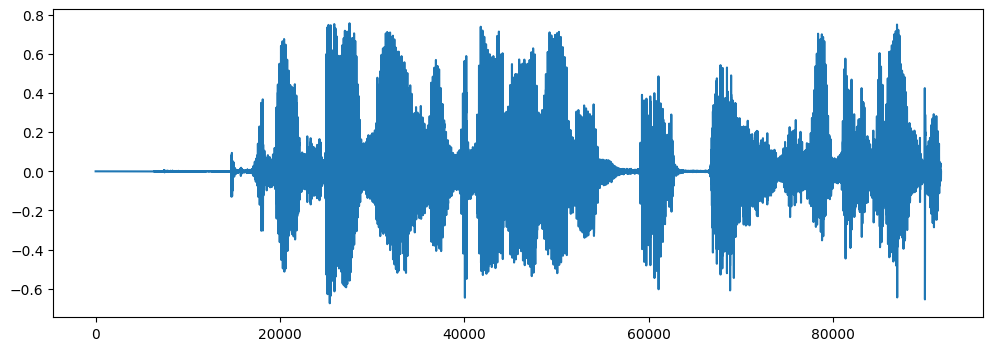

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 180)


In [ ]:
mfccs

array([[-565.53955  , -565.53955  , -565.53955  , ..., -214.65863  ,
        -224.18787  , -261.32935  ],
       [   0.       ,    0.       ,    0.       , ...,  185.88202  ,
         161.84018  ,  162.816    ],
       [   0.       ,    0.       ,    0.       , ...,  -12.027512 ,
         -32.412373 ,  -17.162983 ],
       ...,
       [   0.       ,    0.       ,    0.       , ...,   -4.1042314,
          -8.403847 ,   -8.094025 ],
       [   0.       ,    0.       ,    0.       , ...,  -12.576227 ,
         -22.53928  ,  -21.905382 ],
       [   0.       ,    0.       ,    0.       , ...,    3.3721235,
          -4.4866133,   -6.2577996]], dtype=float32)

In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/Intoxicated-20230513T114658Z-001/Intoxicated'
# metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
# metadata.head()

In [ ]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features


In [ ]:
data=features_extractor(audio_file_path)

In [ ]:
%cd "/content/drive/MyDrive/Intoxicated-20230513T114658Z-001/Intoxicated"


/content/drive/MyDrive/Intoxicated-20230513T114658Z-001/Intoxicated


In [ ]:
!pip install resampy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import resampy

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for files in os.listdir("/content/drive/MyDrive/Intoxicated-20230513T114658Z-001/Intoxicated"):
    file_name = files
    print(file_name)
    # audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    # print(audio)
    # final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data])

saurabh_reading.mp3
saurabh_reading_2.mp3
Manish1.mp3
raj1.mp3
raj_song.mp3
saurabh_dialogue.mp3
tulsi-dialogue.mp3
Saurabh2.mp3
saurav1.mp3
manish_reading.mp3
raj_reading.mp3
vaibhav 1.mp3
29 Jul, 12.00 am.mp3
tulsi_Song.mp3
Aman1.mp3
manish_song.mp3


In [ ]:
#Intoxicated
extracted_features

[[array([-230.35434   ,  127.52835   ,  -28.074146  ,   35.97501   ,
           -4.3113885 ,    9.623723  ,  -23.544165  ,   -8.979836  ,
          -16.80876   ,  -13.297909  ,  -10.320506  ,  -15.187316  ,
            0.9493973 ,  -14.803249  ,  -12.115434  ,   -6.4693127 ,
          -11.5018835 ,   -6.300287  ,   -2.5617921 ,  -13.599785  ,
           -3.5338848 ,   -2.5356236 ,   -2.4510467 ,   -0.96024424,
           -6.2119217 ,   -2.0476074 ,   -8.298581  ,    1.2733549 ,
           -5.1214604 ,   -5.078965  ,   -1.9393781 ,   -5.4614606 ,
            0.9763046 ,   -4.662813  ,   -2.7226775 ,   -4.6224875 ,
           -1.8027376 ,    0.47391486,   -2.4057548 ,   -1.1240506 ],
        dtype=float32)],
 [array([-2.27528748e+02,  1.20031433e+02, -3.15353642e+01,  4.42666016e+01,
         -5.74966002e+00,  1.69076309e+01, -2.71082764e+01, -1.55417290e+01,
         -1.71897831e+01, -4.38493156e+00, -2.06073737e+00, -9.78931427e+00,
         -1.93976772e+00, -1.89214401e+01, -6.4263892

In [ ]:
### converting extracted_features to Pandas dataframe
intox_df=pd.DataFrame(extracted_features,columns=['feature'])
intox_df.head()

,feature
0,"[-230.35434, 127.52835, -28.074146, 35.97501, ..."
1,"[-227.52875, 120.03143, -31.535364, 44.2666, -..."
2,"[-261.22693, 118.01174, -22.045824, 52.861385,..."
3,"[-239.7189, 131.19508, -37.758762, 36.997807, ..."
4,"[-263.16284, 104.8888, -19.549694, 30.331932, ..."


In [ ]:
%cd "/content/drive/MyDrive/Sober-20230513T114711Z-001/Sober"


/content/drive/MyDrive/Sober-20230513T114711Z-001/Sober


In [ ]:
extracted_features=[]
for files in os.listdir("/content/drive/MyDrive/Sober-20230513T114711Z-001/Sober"):
    file_name = files
    print(file_name)
    # audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    # print(audio)
    # final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data])

Raj_reading.ogg
SauravReading.ogg
RajSong.ogg
RajReading.ogg
baibhav.ogg
ManishReading.ogg
ManishSong.ogg
Manish1.ogg
saurav_dialogue.ogg
aman_reading.ogg


In [ ]:
#sober
extracted_features

[[array([-3.8914856e+02,  1.3364508e+02, -7.0028186e+00,  3.1341615e+00,
         -1.9443234e+00, -1.7481115e-01, -1.3563925e+01, -4.1211147e+00,
         -1.8885309e+01, -8.0596561e+00, -1.7283138e+01, -1.1470195e+01,
         -2.7364450e+00, -1.3241442e+01,  1.8843400e+00, -1.0636695e+01,
         -5.6832757e+00, -5.5561280e+00, -6.3236437e+00, -8.8717346e+00,
         -4.5486879e+00, -8.1089216e-01, -9.2170382e+00,  3.5963458e-01,
         -5.0302052e+00, -2.9544191e+00, -1.8910730e+00, -2.7240610e+00,
         -2.4527493e+00, -1.2595458e+00,  1.5176432e-01, -3.2823203e+00,
          1.5143439e+00, -8.2012796e-01,  7.1624011e-01,  9.7792965e-01,
          1.0274085e+00,  1.2757174e+00,  8.1675452e-01,  2.2220585e+00],
        dtype=float32)],
 [array([-3.2989664e+02,  1.5107793e+02, -2.8165831e+01,  4.6741760e+01,
         -7.6227431e+00, -1.7902267e-01, -1.0888222e+01, -8.3010397e+00,
         -1.4813683e+01,  5.4825778e+00, -1.4702891e+01, -3.8101342e+00,
         -6.1324887e+00, 

In [ ]:
sober_df=pd.DataFrame(extracted_features,columns=['feature'])
sober_df.head()

,feature
0,"[-389.14856, 133.64508, -7.0028186, 3.1341615,..."
1,"[-329.89664, 151.07793, -28.16583, 46.74176, -..."
2,"[-414.37076, 115.75034, 7.82706, 12.899946, -5..."
3,"[-318.47818, 141.36562, -19.18905, 12.265838, ..."
4,"[-352.60953, 169.88528, -31.467682, 32.632637,..."


In [ ]:
final_class = ['sober','sober','sober','sober','sober','sober','sober','sober','sober','sober']

In [ ]:
sober_df['class'] = final_class

In [ ]:
final_class = ['intoxicated','intoxicated','intoxicated','intoxicated','intoxicated','intoxicated','intoxicated','intoxicated','intoxicated','intoxicated','intoxicated','intoxicated','intoxicated','intoxicated','intoxicated','intoxicated']

In [ ]:
intox_df['class'] = final_class

In [ ]:
final_df = pd.concat([intox_df,sober_df])

In [ ]:
final_df.head()

,feature,class
0,"[-230.35434, 127.52835, -28.074146, 35.97501, ...",intoxicated
1,"[-227.52875, 120.03143, -31.535364, 44.2666, -...",intoxicated
2,"[-261.22693, 118.01174, -22.045824, 52.861385,...",intoxicated
3,"[-239.7189, 131.19508, -37.758762, 36.997807, ...",intoxicated
4,"[-263.16284, 104.8888, -19.549694, 30.331932, ...",intoxicated


In [ ]:
final_df = final_df.sample(frac = 1)

In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(final_df['feature'].tolist())
y=np.array(final_df['class'].tolist())

In [ ]:
X.shape

(26, 40)

In [ ]:
y

array(['intoxicated', 'intoxicated', 'intoxicated', 'sober', 'sober',
       'sober', 'sober', 'sober', 'sober', 'intoxicated', 'intoxicated',
       'intoxicated', 'intoxicated', 'intoxicated', 'intoxicated',
       'intoxicated', 'intoxicated', 'intoxicated', 'intoxicated',
       'sober', 'intoxicated', 'sober', 'sober', 'intoxicated',
       'intoxicated', 'sober'], dtype='<U11')

In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-3.06674103e+02,  1.59898407e+02, -4.45754051e+01,
         3.11512241e+01, -6.31849384e+00, -2.25402660e+01,
         9.45301151e+00, -1.50400124e+01, -1.20065660e+01,
         4.97453499e+00, -1.08838587e+01, -4.38630533e+00,
         1.68709800e-01, -7.35992622e+00,  7.66320750e-02,
        -5.26358652e+00, -7.85894728e+00, -4.38137674e+00,
        -4.73747253e+00, -7.33877039e+00, -3.57019949e+00,
        -1.82466328e-01, -5.93670321e+00, -5.26951599e+00,
        -2.79537344e+00, -2.81960773e+00, -1.60334718e+00,
        -1.09478498e+00, -3.01537776e+00, -2.38724446e+00,
        -3.80387211e+00, -4.01061869e+00, -3.29744458e+00,
        -5.55047417e+00, -2.77779770e+00, -2.15111637e+00,
        -2.51216125e+00, -3.08713341e+00, -4.22972918e+00,
        -4.09981823e+00],
       [-2.34730042e+02,  1.13801804e+02, -2.43384399e+01,
         2.69843845e+01, -1.50627403e+01, -1.37912989e+01,
        -1.97709732e+01, -1.20011311e+01, -2.07695484e+01,
        -1.73554552e+00, -6.76

In [ ]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
X_train.shape

(20, 40)

In [ ]:
X_test.shape

(6, 40)

In [ ]:
y_train.shape

(20, 2)

In [ ]:
y_test.shape

(6, 2)

### Model Creation

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:
num_labels

2

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

history=model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 15.5602 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 21.91291, saving model to saved_models/audio_classification.hdf5
1/1 [==============================] - 2s 2s/step - loss: 15.5602 - accuracy: 0.5000 - val_loss: 21.9129 - val_accuracy: 0.1667
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 22.9612 - accuracy: 0.6500
Epoch 2: val_loss improved from 21.91291 to 13.00672, saving model to saved_models/audio_classification.hdf5
1/1 [==============================] - 0s 97ms/step - loss: 22.9612 - accuracy: 0.6500 - val_loss: 13.0067 - val_accuracy: 0.1667
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 17.3472 - accuracy: 0.7500
Epoch 3: val_loss improved from 13.00672 to 2.52096, saving model to saved_models/audio_classification.hdf5
1/1 [==============================] - 0s 119ms/step - loss: 17.3472 - accuracy: 0.7500 - val_loss: 2.5210 - val_accuracy: 0.3333
Epoch 4/1

In [ ]:
!pip freeze > requirements.txt

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predict_y=model.predict(X_test)
classes = np.argmax(predict_y,axis=1)
print(classes)

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [ ]:
filename="/content/drive/MyDrive/Intern/Sober/aman_reading.ogg"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predict_label=model.predict(mfccs_scaled_features)
predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

In [ ]:
!pip install pyserial
import serial
import time

# arduino = serial.Serial('COM3', 9600)
# time.sleep(2)

value = predicted_label  # replace with your Python code output
print(value*100)

# arduino.write(str(value).encode())  # send the value to Arduino
# print(f"Sent value to Arduino: {value}")

# arduino.close()
